In [83]:
import numpy as np
import math
import scipy.stats
import matplotlib.pyplot as plt

In [84]:
def readExcelSheet1(excelfile):
    from pandas import read_excel
    return (read_excel(excelfile)).values

In [85]:
def readExcelRange(excelfile,sheetname="Sheet1",startrow=1,endrow=1,startcol=1,endcol=1):
    from pandas import read_excel
    values=(read_excel(excelfile, sheetname,header=None)).values;
    return values[startrow-1:endrow,startcol-1:endcol]

In [86]:
def readExcel(excelfile,**args):
    if args:
        data=readExcelRange(excelfile,**args)
    else:
        data=readExcelSheet1(excelfile)
    if data.shape==(1,1):
        return data[0,0]
    elif (data.shape)[0]==1:
        return data[0]
    else:
        return data

In [87]:
def writeExcelData(x,excelfile,sheetname,startrow,startcol):
    from pandas import DataFrame, ExcelWriter
    from openpyxl import load_workbook
    df=DataFrame(x)
    book = load_workbook(excelfile)
    writer = ExcelWriter(excelfile, engine='openpyxl') 
    writer.book = book
    writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
    df.to_excel(writer, sheet_name=sheetname,startrow=startrow-1, startcol=startcol-1, header=False, index=False)
    writer.save()
    writer.close()

In [88]:
def getSheetNames(excelfile):
    from pandas import ExcelFile
    return (ExcelFile(excelfile)).sheet_names

In [89]:
excelfile=r"/Users/gholami/Documents/ucsc machine learning/assignment/Assignment_1_Data_and_Template.xlsx";

In [90]:
def BF(x,B,xmin,xmax):
    return (np.round(((B-1)*(x-xmin)/(xmax-xmin)))).astype('int32');
    

def Build1DHistogramClassifier(X,T,B,xmin,xmax):
    HF=np.zeros(B).astype('int32');
    HM=np.zeros(B).astype('int32');
    for i,x in enumerate(X):
        b = BF(x,B,xmin,xmax)
        if T[i]=='Female':
            HF[b]+=1;
        elif T[i]=='Male':
            HM[b]+=1;
        else:
            print i + x + "error";
            
    return [HF,HM]

In [91]:
def Build1DHistogramClassifier(X,T,B,xmin,xmax):
    HF=np.zeros(B).astype('int32');
    HM=np.zeros(B).astype('int32');
    for i,x in enumerate(X):
        b = BF(x,B,xmin,xmax)
        if T[i]=='Female':
            HF[b]+=1;
        elif T[i]=='Male':
            HM[b]+=1;
        else:
            print i + x + "error";
            
    return [HF,HM]

In [92]:
def Apply1DHistogramClassifier(queries, HF, HM, xmin, xmax):
    B = np.alen(HF);
    binindices = np.clip(((np.round(((B-1)*(queries-xmin)/(xmax-xmin)))).astype('int32')),0,B-1)
    countF = HF[binindices];
    countM = HM[binindices];
    resultlabel = np.full(np.alen(binindices),"Indeterminate", dtype=object);
    indicesF = countF > countM;
    indicesM = countM > countF;
    resultlabel[indicesF]="Female";
    resultlabel[indicesM]="Male";
    resultprob = countF/(countF+countM);
    return resultlabel, resultprob
    
    
    

In [93]:
def Build1DBayesianClassifier(X,T):
    muF = np.mean(X[T=='Female'])
    muM = np.mean(X[T=='Male'])
    sigmaF = np.std(X[T=='Female'],ddof=1)
    sigmaM = np.std(X[T=='Male'],ddof=1)
    NF = len(T[T=='Female']);
    NM = len(T[T=='Male']);
    return [muF,muM,sigmaF,sigmaM,NF,NM]
    

In [94]:
def pdf(x,mu,sigma):
    return (1.0/(np.sqrt(2*np.pi)*sigma))*np.exp(-0.5*((x-mu)/sigma)**2)

In [95]:
def Apply1DBayesianClassifier(queries,muF,muM,sigmaF,sigmaM,NF,NM):
    w=1;
    countF=NF*w*pdf(queries,muF,sigmaF)
    countM=NM*w*pdf(queries,muM,sigmaM)
    resultlabel=np.full(np.alen(queries),"Indeterminate",dtype=object);
    indicesF=countF>countM;
    indicesM=countM>countF;
    resultlabel[indicesF]="Female";
    resultlabel[indicesM]="Male";
    resultprob=countF/(countF+countM);
    return resultlabel, resultprob

Prepare Data

In [96]:
excelfile=r"/Users/gholami/Documents/ucsc machine learning/assignment/Assignment_1_Data_and_Template.xlsx";

In [97]:
sheets=getSheetNames(excelfile);sheets

[u'Data',
 u'Classifiers - Full Data',
 u'Classifiers - Partial Data',
 u'Observations']

In [98]:
data=readExcel(excelfile)
X=np.array(data[:,0]*12+data[:,1],dtype=float)
T=np.array([str(g) for g in data[:,2]])
X50=X[:50]
T50=T[:50]

In [99]:
queries=(readExcel(excelfile,
                  sheetname='Classifiers - Full Data',
                  startrow=17,
                  endrow=17,
                  startcol=2,
                  endcol=7)).astype(float);queries

array([ 55.,  60.,  65.,  70.,  75.,  80.])

Histogram Classifier

In [100]:
B = 32;
xmin = np.amin(X);
xmax = np.amax(X);
[HF,HM] = Build1DHistogramClassifier(X,T,B,xmin,xmax);

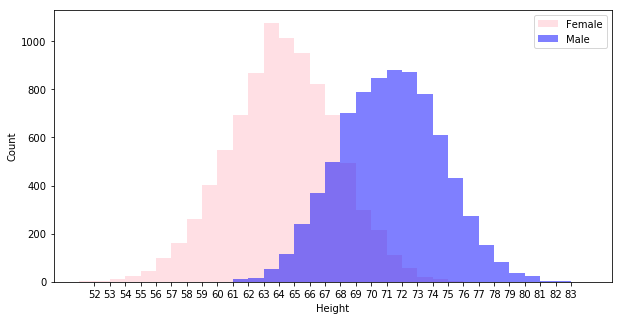

In [101]:
plt.figure(figsize=(10,5));
opacity=0.5
[bincenters,binwidth]=np.linspace(xmin, xmax, num=B, retstep=True);
rects1=plt.bar(bincenters-(binwidth/2), HF, binwidth,
              alpha=opacity,
              color='pink',
              label='Female')
rects2=plt.bar(bincenters+(binwidth/2), HM, binwidth,
              alpha=opacity,
              color='b',
              label='Male')
plt.xlabel('Height')
plt.ylabel('Count')
plt.xticks(bincenters,bincenters.astype('int32'), fontsize=10)
plt.legend()
plt.show()

In [102]:
[resultHlabel, resultHprob]=Apply1DHistogramClassifier(queries, HF, HM, xmin, xmax)

In [103]:
[resultHlabel, resultHprob]

[array(['Female', 'Female', 'Female', 'Male', 'Male', 'Male'], dtype=object),
 array([1, 0, 0, 0, 0, 0], dtype=int32)]

resultHprob = []
for q in queries:
    b = BF(q,B,xmin,xmax);
    resultHprob.append(HF[b]*1.0/(HF[b]+HM[b]));

M = []
F = []
for i,x in enumerate(X):
    if T[i]=='Female':
        F.append(X[i])
    elif T[i]=='Male':
        M.append(X[i])
    else:
        print 'error'
    
muF = np.mean(F)
sigmaF = np.std(F,ddof=1)
NF = len(F)
print muF,sigmaF,NF

muM = np.mean(M)
sigmaM = np.std(M,ddof=1)
NM = len(M)
print muM,sigmaM,NM

resultBprob = []
for q in queries:
    bpF = bprob(q,muF,sigmaF);
    bpM = bprob(q,muM,sigmaM);
    resultBprob.append((NF*1.0*bpF)/(NF*bpF+NM*bpM));
    
resultBprob 
#writeExcelData([resultBprob],excelfile,'Classifiers - Full Data',19,2)

#bf = bprob(98,100,3)
#print "bf is", bf

#sbf=scipy.stats.norm(100,3).pdf(98);
#print "sbf is", bf

With just 50 samples

In [104]:
[HF50,HM50] = Build1DHistogramClassifier(X50,T50,B,xmin,xmax)

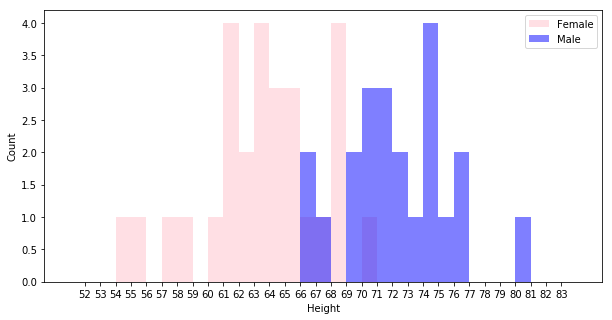

In [105]:
plt.figure(figsize=(10,5));
opacity=0.5
rects1=plt.bar(bincenters-(binwidth/2), HF50, binwidth,
              alpha=opacity,
              color='pink',
              label='Female')
rects2=plt.bar(bincenters+(binwidth/2), HM50, binwidth,
              alpha=opacity,
              color='b',
              label='Male')
plt.xlabel('Height')
plt.ylabel('Count')
plt.xticks(bincenters,bincenters.astype('int32'), fontsize=10)
plt.legend()
plt.show()

In [106]:
[resultHlabel50, resultHprob50]=Apply1DHistogramClassifier(queries, HF50, HM50, xmin, xmax)

/Users/gholami/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in divide
  # This is added back by InteractiveShellApp.init_path()


In [107]:
[resultHlabel50, resultHprob50]

[array(['Female', 'Indeterminate', 'Female', 'Male', 'Male', 'Male'], dtype=object),
 array([1, 0, 1, 0, 0, 0], dtype=int32)]

Bayesian Classifier

In [108]:
[muF,muM,sigmaF,sigmaM,NF,NM]=Build1DBayesianClassifier(X,T)

In [109]:
[resultBlabel, resultBprob]=Apply1DBayesianClassifier(queries,muF,muM,sigmaF,sigmaM,NF,NM)

In [110]:
[resultBlabel, resultBprob]

[array(['Female', 'Female', 'Female', 'Male', 'Male', 'Male'], dtype=object),
 array([ 0.99945946,  0.98847936,  0.83170428,  0.26106772,  0.03039783,
         0.00344112])]

With just 50 samples

In [111]:
[muF50,muM50,sigmaF50,sigmaM50,NF50,NM50]=Build1DBayesianClassifier(X50,T50)

In [112]:
[resultBlabel50, resultBprob50]=Apply1DBayesianClassifier(queries,muF50,muM50,sigmaF50,sigmaM50,NF50,NM50)

In [113]:
[resultBlabel50, resultBprob50]

[array(['Female', 'Female', 'Female', 'Male', 'Male', 'Male'], dtype=object),
 array([ 0.99990803,  0.99556458,  0.88316529,  0.29340843,  0.03587324,
         0.00540894])]

resultHprob50 = []
for q in queries:
    b = BF(q,B,xmin,xmax);
    print q,b,HF50[b],HM50[b];
    resultHprob50.append(HF50[b]*1.0/(HF50[b]+HM50[b]));

M50 = []
F50 = []
for i,x in enumerate(X50):
    if T50[i]=='Female':
        F50.append(X50[i])
    elif T50[i]=='Male':
        M50.append(X50[i])
    else:
        print 'error'
    
muF50 = np.mean(F50)
sigmaF50 = np.std(F50,ddof=1)
NF50 = len(F50)
print muF50,sigmaF50,NF50

muM50 = np.mean(M50)
sigmaM50 = np.std(M50,ddof=1)
NM50 = len(M50)
print muM50,sigmaM50,NM50

resultBprob50 = []
for q in queries:
    bpF50 = bprob(q,muF50,sigmaF50);
    bpM50 = bprob(q,muM50,sigmaM50);
    resultBprob50.append((NF50*1.0*bpF50)/(NF50*bpF50+NM50*bpM50));
    
resultBprob50 
#writeExcelData([xmin,xmax],excelfile,'Classifiers - Partial Data',1,2)
#writeExcelData([HF50],excelfile,'Classifiers - Partial Data',5,3)
#writeExcelData([HM50],excelfile,'Classifiers - Partial Data',6,3)
#writeExcelData([muF50,muM50],excelfile,'Classifiers - Partial Data',8,3)
#writeExcelData([sigmaF50,sigmaM50],excelfile,'Classifiers - Partial Data',11,3)
#writeExcelData([NF50,NM50],excelfile,'Classifiers - Partial Data',14,3)
#writeExcelData([resultHprob50],excelfile,'Classifiers - Partial Data',18,2)
#writeExcelData([resultBprob50],excelfile,'Classifiers - Partial Data',19,2)
print resultHprob50